<a href="https://colab.research.google.com/github/raihanalmenata/ML/blob/main/food_classifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Roadmap
1. Convolution Layer
2. Max Pooling
3. 1 Hidden Layer Consist of 100 Neurons ReLu
4. Output Layer 2 Neurons, Softmax activiton function



## Import Required Libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Image Data Generator

In [5]:
def generators(TRAIN_DIR, VAL_DIR):

  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
  
  val_datagen = ImageDataGenerator(rescale=1./255)

  ##rotation range until fill_mode values were still placeholder

  train_generator = train_datagen.flow_from_directory(directory=TRAIN_DIR,
                                                      batch_size=100,
                                                      class_mode='categorical',
                                                      target_size=(128, 128))
  
  val_generator = val_datagen.flow_from_directory(directory=VAL_DIR,
                                                  batch_size=100,
                                                  class_mode='categorical',
                                                  target_size=(128, 128))
  
  return train_generator, val_generator

In [6]:
TRAIN_DIR='/content/drive/MyDrive/C22-PS335: Capstone Project/DATASET/TRAIN'
VAL_DIR='/content/drive/MyDrive/C22-PS335: Capstone Project/DATASET/VALIDATION'

# Test the generators
train_generator, val_generator = generators(TRAIN_DIR, VAL_DIR)

Found 1053 images belonging to 4 classes.
Found 451 images belonging to 4 classes.


# Food Classification Model

Below is the code written to build the baseline version of the food classification model. 
The model is desgined to fulfill the minimum criteria of the model by implementing minimum configuration. The model then expected to represent the possible accuracy of the model with the estimated available dataset.

In [7]:
def model():
  # The input is assumed to be 150x150 RGB Image
  model = tf.keras.models.Sequential(
      [tf.keras.layers.Conv2D(24, 7, activation='relu', input_shape=(128,128,3)), 
       tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
       tf.keras.layers.Conv2D(48, 5, activation='relu'),
       tf.keras.layers.MaxPool2D(pool_size=(2,2)),
       tf.keras.layers.Conv2D(72, 3, activation='relu'),
       tf.keras.layers.MaxPool2D(pool_size=(2,2)),
       tf.keras.layers.Dropout(0.25),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(128, activation='relu'),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(4, activation='softmax')]) # The output label is configured to be 10

  model.compile(optimizer='RMSProp', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

  return model

## Train Model

In [8]:
model = model()
history = model.fit(train_generator, epochs=10, verbose=1, validation_data=val_generator)

Epoch 1/10
11/11 [==============================] - 518s 48s/step - loss: 2.0562 - accuracy: 0.3124 - val_loss: 1.3524 - val_accuracy: 0.3459
Epoch 2/10
11/11 [==============================] - 62s 6s/step - loss: 1.3144 - accuracy: 0.3808 - val_loss: 1.1562 - val_accuracy: 0.4945
Epoch 3/10
11/11 [==============================] - 62s 5s/step - loss: 1.4225 - accuracy: 0.3694 - val_loss: 1.2526 - val_accuracy: 0.4922
Epoch 4/10
11/11 [==============================] - 62s 6s/step - loss: 1.2918 - accuracy: 0.4387 - val_loss: 1.3561 - val_accuracy: 0.2616
Epoch 5/10
11/11 [==============================] - 61s 5s/step - loss: 1.2686 - accuracy: 0.3951 - val_loss: 1.1337 - val_accuracy: 0.5078
Epoch 6/10
11/11 [==============================] - 61s 5s/step - loss: 1.4209 - accuracy: 0.4359 - val_loss: 1.2173 - val_accuracy: 0.4390
Epoch 7/10
11/11 [==============================] - 62s 5s/step - loss: 1.2484 - accuracy: 0.4520 - val_loss: 1.1517 - val_accuracy: 0.5455
Epoch 8/10
11/11 [

## Visualization

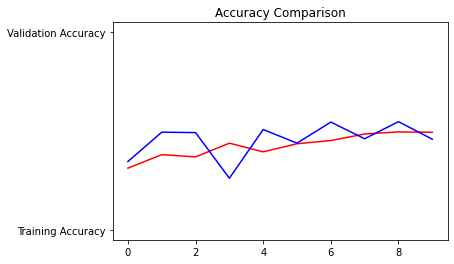

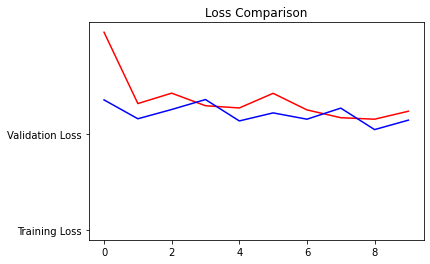

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))


plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Accuracy Comparison')
plt.show()
print('')


plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Loss Comparison')
plt.show()

## Missing Part

- Image Pre-processing process.
- Train operation